# 3D Map

While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. We'll then plot the result!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 16, 16

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [4]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)

    for i in range(data.shape[0]):
        
        # DONE: fill in the voxels that are part of an obstacle with `True`
        #
        # i.e. grid[0:5, 20:26, 2:7] = True
        n_upper = int(data[i,0] + data[i,3]) // voxel_size
        n_lower = int(data[i,0] - data[i,3]) // voxel_size
        e_further = int(data[i,1] + data[i,4]) // voxel_size
        e_closer = int(data[i,1] - data[i,4]) // voxel_size
        alt = int(data[i,2] + data[i,5]) // voxel_size
        voxmap[n_lower:n_upper, e_closer:e_further, 0:alt] = True

    return voxmap

Create 3D grid.

In [5]:
voxmap = create_voxmap(data, 10)
print(voxmap.shape)

-32 -31 -45 -44 17
-31 -30 -45 -44 17
-30 -29 -45 -44 17
-29 -28 -45 -44 17
-23 -22 -45 -44 10
-22 -21 -45 -44 10
-18 -17 -45 -44 0
-17 -16 -45 -44 0
-16 -15 -45 -44 0
-15 -14 -45 -44 9
-14 -13 -45 -44 9
-13 -12 -45 -44 5
-12 -11 -45 -44 5
-11 -10 -45 -44 1
-10 -9 -45 -44 1
-9 -8 -45 -44 1
-5 -4 -45 -44 4
-4 -3 -45 -44 4
-2 -1 -45 -44 1
-1 0 -45 -44 2
1 2 -45 -44 5
3 4 -45 -44 10
4 5 -45 -44 10
5 6 -45 -44 10
9 10 -45 -44 2
10 11 -45 -44 2
11 12 -45 -44 2
12 13 -45 -44 2
13 14 -45 -44 2
15 16 -45 -44 3
34 35 -45 -44 3
35 36 -45 -44 3
36 37 -45 -44 3
37 38 -45 -44 3
38 39 -45 -44 3
41 42 -45 -44 1
42 43 -45 -44 1
43 44 -45 -44 1
44 45 -45 -44 1
47 48 -45 -44 5
48 49 -45 -44 5
49 50 -45 -44 5
50 51 -45 -44 5
51 52 -45 -44 5
52 53 -45 -44 5
53 54 -45 -44 5
56 57 -45 -44 5
57 58 -45 -44 5
-32 -31 -44 -43 17
-31 -30 -44 -43 17
-30 -29 -44 -43 17
-29 -28 -44 -43 17
-28 -27 -44 -43 17
-23 -22 -44 -43 10
-22 -21 -44 -43 10
-18 -17 -44 -43 9
-17 -16 -44 -43 9
-16 -15 -44 -43 9
-15 -14 -44 -43 9

-7 -6 -31 -30 2
-6 -5 -31 -30 2
-3 -2 -31 -30 4
-2 -1 -31 -30 4
1 2 -31 -30 21
5 6 -31 -30 5
6 7 -31 -30 5
11 12 -31 -30 3
12 13 -31 -30 3
13 14 -31 -30 3
32 33 -31 -30 2
40 41 -31 -30 0
41 42 -31 -30 0
42 43 -31 -30 0
43 44 -31 -30 0
44 45 -31 -30 0
49 50 -31 -30 6
50 51 -31 -30 6
51 52 -31 -30 6
52 53 -31 -30 6
53 54 -31 -30 6
54 55 -31 -30 6
55 56 -31 -30 6
56 57 -31 -30 6
57 58 -31 -30 6
58 59 -31 -30 6
59 60 -31 -30 6
-25 -24 -30 -29 9
-24 -23 -30 -29 9
-23 -22 -30 -29 9
-22 -21 -30 -29 9
-21 -20 -30 -29 9
-16 -15 -30 -29 4
-15 -14 -30 -29 4
-14 -13 -30 -29 4
-13 -12 -30 -29 4
-12 -11 -30 -29 4
-11 -10 -30 -29 1
-10 -9 -30 -29 1
-9 -8 -30 -29 1
-8 -7 -30 -29 1
-7 -6 -30 -29 2
-6 -5 -30 -29 2
-3 -2 -30 -29 4
-2 -1 -30 -29 4
4 5 -30 -29 5
5 6 -30 -29 5
6 7 -30 -29 5
30 31 -30 -29 2
31 32 -30 -29 2
32 33 -30 -29 2
33 34 -30 -29 2
41 42 -30 -29 0
42 43 -30 -29 0
43 44 -30 -29 0
44 45 -30 -29 0
45 46 -30 -29 0
46 47 -30 -29 0
49 50 -30 -29 6
50 51 -30 -29 6
51 52 -30 -29 6
52 53 -30 -2

32 33 -16 -15 13
33 34 -16 -15 13
34 35 -16 -15 13
35 36 -16 -15 13
54 55 -16 -15 1
-32 -31 -15 -14 2
-31 -30 -15 -14 2
-24 -23 -15 -14 16
-23 -22 -15 -14 16
-22 -21 -15 -14 16
-21 -20 -15 -14 16
-20 -19 -15 -14 16
-12 -11 -15 -14 17
-11 -10 -15 -14 17
-10 -9 -15 -14 17
-9 -8 -15 -14 17
-8 -7 -15 -14 17
-7 -6 -15 -14 17
-6 -5 -15 -14 8
-5 -4 -15 -14 8
-4 -3 -15 -14 8
14 15 -15 -14 0
15 16 -15 -14 0
16 17 -15 -14 0
17 18 -15 -14 2
18 19 -15 -14 2
19 20 -15 -14 1
20 21 -15 -14 2
21 22 -15 -14 0
22 23 -15 -14 0
23 24 -15 -14 0
24 25 -15 -14 0
27 28 -15 -14 0
28 29 -15 -14 0
29 30 -15 -14 0
30 31 -15 -14 0
32 33 -15 -14 13
33 34 -15 -14 13
34 35 -15 -14 13
35 36 -15 -14 13
36 37 -15 -14 13
48 49 -15 -14 0
-32 -31 -14 -13 2
-31 -30 -14 -13 2
-30 -29 -14 -13 2
-25 -24 -14 -13 16
-24 -23 -14 -13 15
-23 -22 -14 -13 16
-22 -21 -14 -13 16
-21 -20 -14 -13 16
-11 -10 -14 -13 17
-10 -9 -14 -13 17
-9 -8 -14 -13 17
7 8 -14 -13 1
8 9 -14 -13 1
9 10 -14 -13 1
14 15 -14 -13 0
15 16 -14 -13 0
16 17 -14 -

-3 -2 4 5 8
-2 -1 4 5 8
-1 0 4 5 8
8 9 4 5 14
9 10 4 5 14
10 11 4 5 14
11 12 4 5 14
12 13 4 5 14
17 18 4 5 0
21 22 4 5 0
23 24 4 5 0
24 25 4 5 1
25 26 4 5 1
26 27 4 5 1
27 28 4 5 1
30 31 4 5 0
31 32 4 5 0
32 33 4 5 0
33 34 4 5 0
36 37 4 5 13
37 38 4 5 13
38 39 4 5 13
39 40 4 5 13
43 44 4 5 0
-24 -23 5 6 11
-23 -22 5 6 11
-22 -21 5 6 11
-20 -19 5 6 14
-19 -18 5 6 14
-18 -17 5 6 14
-5 -4 5 6 8
-4 -3 5 6 8
-3 -2 5 6 8
-2 -1 5 6 8
-1 0 5 6 8
0 1 5 6 8
17 18 5 6 0
18 19 5 6 0
19 20 5 6 0
20 21 5 6 0
21 22 5 6 0
22 23 5 6 0
23 24 5 6 0
24 25 5 6 1
25 26 5 6 0
26 27 5 6 0
27 28 5 6 0
30 31 5 6 0
31 32 5 6 0
32 33 5 6 0
33 34 5 6 0
48 49 5 6 0
-25 -24 6 7 11
-24 -23 6 7 11
-23 -22 6 7 11
-22 -21 6 7 11
-21 -20 6 7 11
-19 -18 6 7 14
-17 -16 6 7 10
-6 -5 6 7 8
-5 -4 6 7 8
-4 -3 6 7 8
-3 -2 6 7 8
-2 -1 6 7 8
0 1 6 7 8
1 2 6 7 8
2 3 6 7 8
11 12 6 7 1
12 13 6 7 1
13 14 6 7 1
17 18 6 7 3
18 19 6 7 3
20 21 6 7 1
21 22 6 7 0
22 23 6 7 0
23 24 6 7 0
24 25 6 7 1
25 26 6 7 0
26 27 6 7 0
27 28 6 7 0
46 47

17 18 24 25 6
18 19 24 25 6
19 20 24 25 6
27 28 24 25 8
28 29 24 25 8
29 30 24 25 8
30 31 24 25 8
35 36 24 25 0
38 39 24 25 0
44 45 24 25 0
-21 -20 25 26 13
-20 -19 25 26 13
-19 -18 25 26 13
-18 -17 25 26 13
-17 -16 25 26 13
-16 -15 25 26 13
-15 -14 25 26 13
3 4 25 26 0
4 5 25 26 0
5 6 25 26 0
6 7 25 26 0
7 8 25 26 0
8 9 25 26 0
9 10 25 26 0
14 15 25 26 6
15 16 25 26 6
16 17 25 26 6
17 18 25 26 6
18 19 25 26 6
19 20 25 26 6
20 21 25 26 6
28 29 25 26 8
29 30 25 26 8
35 36 25 26 0
-21 -20 26 27 13
-20 -19 26 27 13
-19 -18 26 27 13
-18 -17 26 27 13
-17 -16 26 27 13
-16 -15 26 27 13
-15 -14 26 27 13
4 5 26 27 0
5 6 26 27 0
6 7 26 27 0
7 8 26 27 0
8 9 26 27 0
13 14 26 27 6
14 15 26 27 6
15 16 26 27 6
16 17 26 27 6
17 18 26 27 6
18 19 26 27 6
19 20 26 27 6
20 21 26 27 6
21 22 26 27 6
30 31 26 27 0
59 60 26 27 1
-21 -20 27 28 13
-20 -19 27 28 13
-19 -18 27 28 13
-18 -17 27 28 13
-17 -16 27 28 13
-16 -15 27 28 13
5 6 27 28 0
6 7 27 28 0
7 8 27 28 0
12 13 27 28 17
13 14 27 28 6
14 15 27 28 6
15

46 46 4 5 0
48 49 5 6 0
47 47 10 11 1
44 45 12 12 0
46 46 14 15 0
52 52 9 10 0
44 45 10 10 0
50 50 12 12 0
49 49 15 15 0
44 44 8 8 0
49 50 -4 -4 0
47 47 5 5 0
47 48 13 14 0
53 53 13 13 1
54 55 12 13 0
46 46 1 2 0
46 46 -2 -2 0
42 42 0 0 0
49 50 -3 -2 0
54 54 16 16 0
43 43 6 6 0
49 50 -7 -7 0
46 47 0 0 0
43 43 4 4 0
48 48 8 8 0
47 47 10 10 0
51 51 9 9 0
51 51 -7 -7 0
45 45 -5 -5 0
47 48 -4 -4 0
47 47 -3 -3 0
46 47 -4 -3 0
47 47 11 12 0
51 52 12 12 0
45 45 6 6 0
52 52 11 11 0
43 44 -2 -2 0
44 45 9 9 0
43 43 1 1 0
44 45 5 5 0
51 51 7 7 0
51 52 15 16 0
47 47 -4 -3 0
49 50 5 5 0
47 47 2 2 0
51 51 -5 -5 0
50 50 3 3 0
50 50 -2 -1 0
49 49 4 5 0
48 48 2 2 0
51 51 13 13 0
42 42 0 1 0
50 51 13 14 0
48 49 6 6 1
42 42 -1 -1 0
50 51 7 7 0
48 48 12 12 0
46 46 -5 -5 0
46 46 7 7 0
47 47 9 9 0
44 44 12 12 0
47 48 11 11 0
42 42 -5 -5 0
50 50 2 2 0
49 50 10 10 0
45 46 4 4 0
46 47 -4 -4 0
46 47 14 15 0
47 47 15 16 0
52 52 14 14 0
48 48 10 10 0
44 44 4 4 0
54 54 12 12 0
47 47 4 5 0
50 50 -6 -5 0
47 48 -7 -6

Plot the 3D grid. 

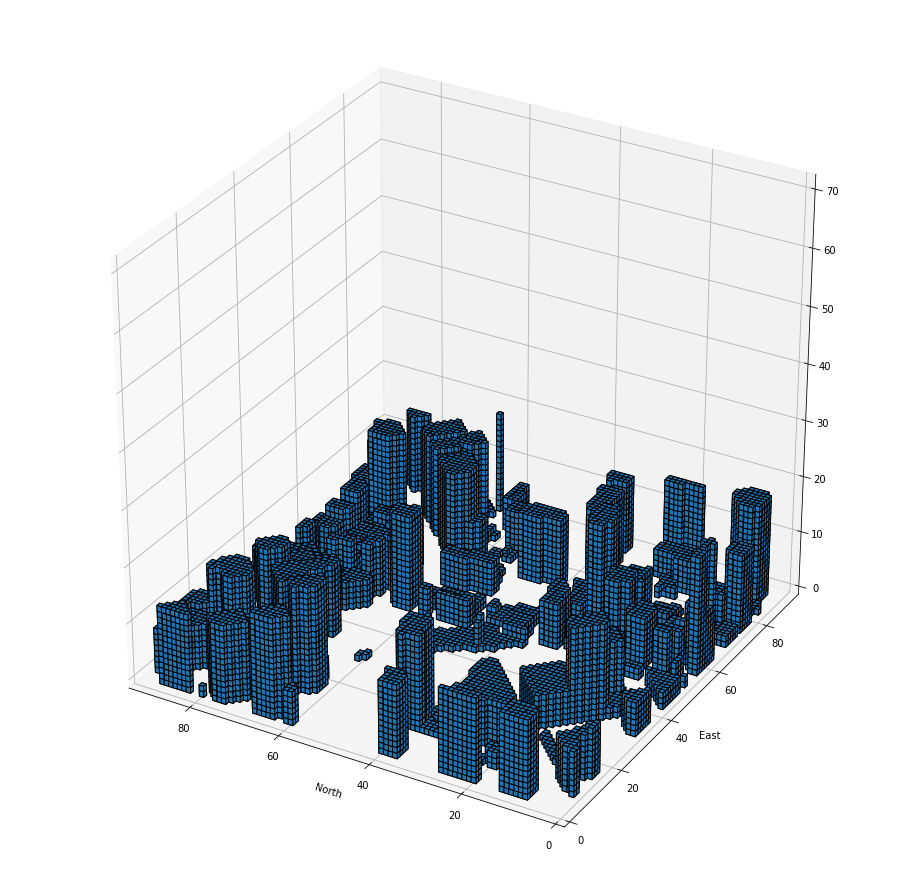

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+50)

plt.xlabel('North')
plt.ylabel('East')

plt.show()

Isn't the city pretty?

[solution](/notebooks/Voxel-Map-Solution.ipynb)